In [9]:
from environment import Environment
import numpy as np
import tqdm
import matplotlib.pyplot as plt

In [10]:
env = Environment()
q_table = np.random.uniform(low=-1, high=1, size=([7] + [7] + [4]))
print(q_table.shape)

lr = 0.1
gamma = 0.95
epsilon = 0.2

(7, 7, 4)


In [11]:
scores = []

for i in tqdm.tqdm(range(1, 20000)):
    state = env.reset()
    score = 0
    reward = 0
    done = False
    while not done:
        action = np.argmax(q_table[state])
        #print(action)
        if np.random.uniform(0,1) < epsilon:
            action = np.random.randint(0,4)

        next_state, reward, done = env.step(action)

        old_val = q_table[state + (action, )]
        new_val = (1-lr) * old_val + lr * (reward + gamma * np.max(q_table[next_state]))

        q_table[state + (action, )] = new_val
        state = next_state
        score += 1

    scores.append(score)

100%|██████████| 19999/19999 [00:12<00:00, 1638.60it/s]


10.256410256409985


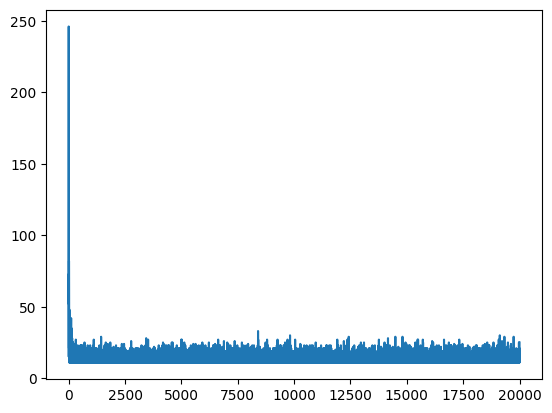

In [12]:
print(np.max(q_table))
plt.plot(scores)

In [13]:
env.render(q_table)